<a href="https://colab.research.google.com/github/Soichiro-Gardinner/Describing_Distribution/blob/main/Describing_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plotting Histograms with KDE:**
- We'll create histograms with a kernel density estimate (KDE) for each feature. The KDE helps to visualize the underlying distribution of the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the medical dataset (replace 'medical_dataset.csv' with your dataset's filename)
df = pd.read_csv('/content/data (1).csv')

df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


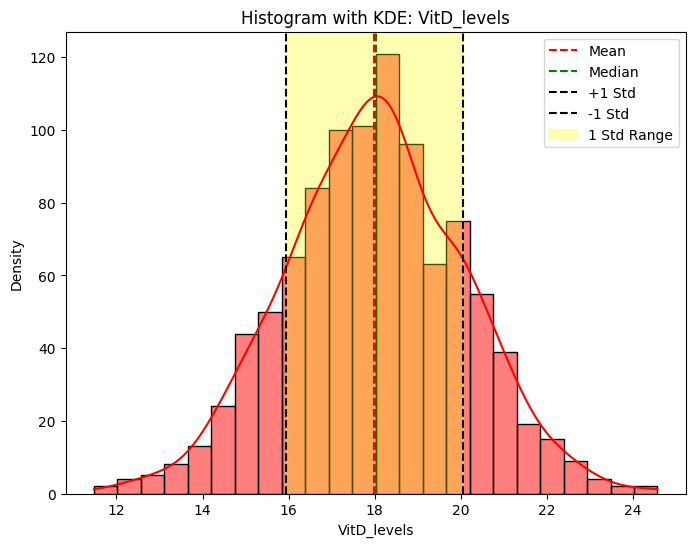

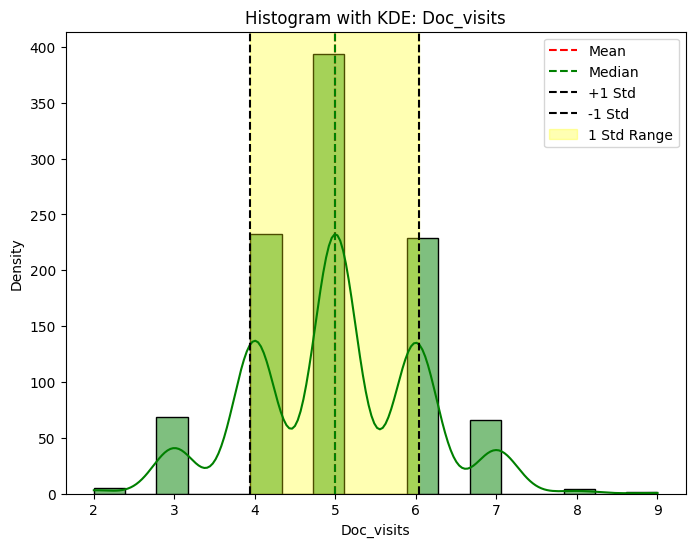

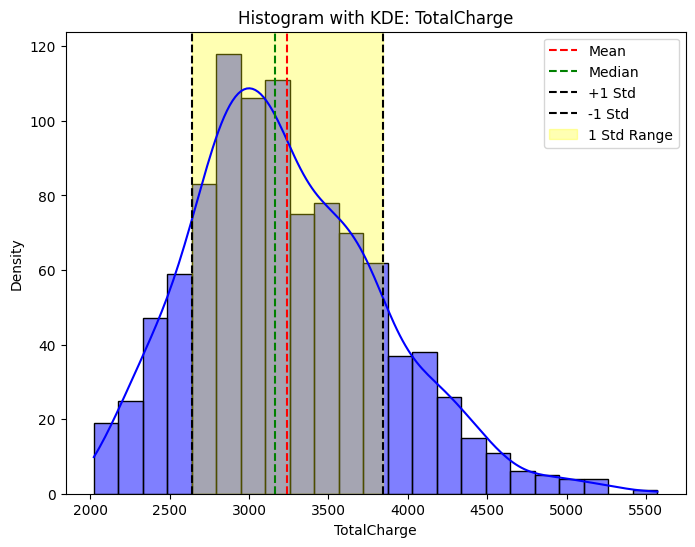

In [ ]:
# Plotting histograms with KDE for each feature
features = ['VitD_levels', 'Doc_visits', 'TotalCharge']
colors = ['red', 'green', 'blue']

for i, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color=colors[i])
    plt.title(f'Histogram with KDE: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.axvline(df[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(df[feature].median(), color='green', linestyle='--', label='Median')
    std = df[feature].std()
    plt.axvline(df[feature].mean() + std, color='black', linestyle='--', label='+1 Std')
    plt.axvline(df[feature].mean() - std, color='black', linestyle='--', label='-1 Std')
    plt.axvspan(df[feature].mean() - std, df[feature].mean() + std, color='yellow', alpha=0.3, label='1 Std Range')
    plt.legend()
    plt.show()

#**Analyzing the Features:**
- After visualizing the distributions, we can answer the following questions about each feature:

- a. **Is it Discrete or Continuous?**
- b. **Does it have a skew? If so, which direction (+/-)?**
- c. **What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)**

**To answer these questions, we can observe the histograms and consider the following characteristics:**

### **Discrete vs. Continuous:**
"Look at the histogram bins". If the feature values are grouped into distinct bins, it is discrete. If the values form a continuous range, it is continuous.

**Skewness**: Skewness refers to the symmetry of the distribution. If the distribution is asymmetric, it is skewed. Positive skewness (+) indicates a longer tail on the right, while negative skewness (-) indicates a longer tail on the left.
**Kurtosis**: Kurtosis measures the shape of the distribution's tails. Mesokurtic distributions have a shape similar to the normal distribution. Leptokurtic distributions have heavier tails and a higher peak. Platykurtic distributions have lighter tails and a flatter peak.


In [ ]:
#Let's analyze the features based on these characteristics:
for feature in features:
    print(f"Feature: {feature}")
    if df[feature].dtype == 'object':
        print("Discrete")
    else:
        print("Continuous")

    skewness = df[feature].skew()
    if skewness > 0:
        print(f"Skew: Positive (+) skewness ({skewness})")
    elif skewness < 0:
        print(f"Skew: Negative (-) skewness ({skewness})")
    else:
        print("Skew: No skewness (symmetric)")

    kurtosis = df[feature].kurtosis()
    if kurtosis > 0:
        print("Kurtosis: Leptokurtic (heavier tails, higher peak)")
    elif kurtosis < 0:
        print("Kurtosis: Platykurtic (lighter tails, flatter peak)")
    else:
        print("Kurtosis: Mesokurtic (similar to a normal distribution)")
    print()

Feature: VitD_levels
Continuous
Skew: Negative (-) skewness (-0.00027169884662487336)
Kurtosis: Leptokurtic (heavier tails, higher peak)

Feature: Doc_visits
Continuous
Skew: Positive (+) skewness (0.031644828091398125)
Kurtosis: Platykurtic (lighter tails, flatter peak)

Feature: TotalCharge
Continuous
Skew: Positive (+) skewness (0.5847985420036158)
Kurtosis: Leptokurtic (heavier tails, higher peak)

